I will use pandas and matplotlib to respectively process and visualize my data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

"neurite_soma_t" is a csv file containing the data of outgrowth of a neuronal culture as I received it from a post-doc in my lab who did the analysis. 

Briefly, the experiment consisted in knocking out and overexpressing one protein to see its effect on neuronal growth, thus the three conditions: wt (wild type control, neuronal culture expressing normal amount of this protein), ko (knocked-out, culture with no protein), and oe (overexpression, more protein present in these cells). 

The wt cells were in the A1 wells, the ko in B1 and the overexpression in the A2. There are around 15 samples per condition. Images of the cultures were taken twice a day (thus the timepoints 0.0 to 3.0), and masks for neurites and somas were generated and used to get the three values: neurite_area, soma_count and norm_neurite_area (neurite area normalised by soma count).

In [2]:
df = pd.read_csv('neurite_soma_t.csv')
df

,wt,A1_7,t,0.0,0.5,1.0,1.5,2.0,2.5,3.0
0,wt,A1_7,neurite_area,4497.480000,14814.776000,23938.894400,44202.924800,57981.358400,71260.072000,126341.516800
1,wt,A1_7,Norm_neurite_area,10.139246,33.398851,53.968522,99.652326,130.714818,160.650726,284.827896
2,wt,A1_7,soma_count,324.000000,350.000000,390.000000,518.000000,459.000000,473.000000,591.000000
3,wt,A1_8,t,0.000000,0.500000,1.000000,1.500000,2.000000,2.500000,3.000000
4,wt,A1_8,neurite_area,6743.913600,15385.225600,23423.798400,45708.235200,53574.596800,75325.486400,108053.302400
...,...,...,...,...,...,...,...,...,...,...
198,oe,A2_20,soma_count,650.000000,400.000000,433.000000,476.000000,500.000000,463.000000,458.000000
199,oe,A2_10,t,0.000000,0.500000,1.000000,1.500000,2.000000,2.500000,3.000000
200,oe,A2_10,neurite_area,3959.320000,10440.304000,24444.764800,32088.174400,39024.288000,41664.347200,55785.665600
201,oe,A2_10,Norm_neurite_area,7.378924,19.457436,45.557336,59.802242,72.728971,77.649209,103.966895


There are several problems in this table. I will just need the normalized neurite area and I don't need to repeat the "t" line (time in days) every three lines because it's always the same. Therefore, I will drop these lines and then "t" column.

In [3]:
df.drop(df[df['t'] == 't'].index, inplace= True)
df.drop(df[df['t'] == 'neurite_area'].index, inplace= True)
df.drop(df[df['t'] == 'soma_count'].index, inplace= True)
df.drop('t', axis = 1, inplace = True)
df

,wt,A1_7,0.0,0.5,1.0,1.5,2.0,2.5,3.0
1,wt,A1_7,10.139246,33.398851,53.968522,99.652326,130.714818,160.650726,284.827896
5,wt,A1_8,19.645192,44.817553,68.234119,133.149249,156.064160,219.425054,314.762013
9,wt,A1_13,14.036711,30.220251,55.853066,134.049296,130.998539,175.119911,261.716215
13,wt,A1_18,12.222726,28.174637,52.006059,108.943644,136.716430,167.112504,278.390104
17,wt,A1_15,14.229548,40.654870,64.781890,120.879015,154.748913,193.146706,302.760949
21,wt,A1_14,15.940435,47.885643,68.685414,135.190939,159.578443,202.737210,285.591899
25,wt,A1_22,22.472099,44.573233,69.051675,135.522273,150.047368,220.514979,365.577835
29,wt,A1_19,15.730581,35.304466,67.327666,121.669968,148.433397,186.200436,278.741864
33,wt,A1_24,10.964381,37.887689,61.180985,128.804146,168.664286,230.820563,333.112512
37,wt,A1_9,13.480663,36.683613,55.501083,122.413803,156.473806,216.044684,304.488070


I now want to rename the first two coloumns with what they actually represent.

In [4]:
df.rename(columns={'wt': 'category', 'A1_7' : 'sample'}, inplace = True)
df

,category,sample,0.0,0.5,1.0,1.5,2.0,2.5,3.0
1,wt,A1_7,10.139246,33.398851,53.968522,99.652326,130.714818,160.650726,284.827896
5,wt,A1_8,19.645192,44.817553,68.234119,133.149249,156.064160,219.425054,314.762013
9,wt,A1_13,14.036711,30.220251,55.853066,134.049296,130.998539,175.119911,261.716215
13,wt,A1_18,12.222726,28.174637,52.006059,108.943644,136.716430,167.112504,278.390104
17,wt,A1_15,14.229548,40.654870,64.781890,120.879015,154.748913,193.146706,302.760949
21,wt,A1_14,15.940435,47.885643,68.685414,135.190939,159.578443,202.737210,285.591899
25,wt,A1_22,22.472099,44.573233,69.051675,135.522273,150.047368,220.514979,365.577835
29,wt,A1_19,15.730581,35.304466,67.327666,121.669968,148.433397,186.200436,278.741864
33,wt,A1_24,10.964381,37.887689,61.180985,128.804146,168.664286,230.820563,333.112512
37,wt,A1_9,13.480663,36.683613,55.501083,122.413803,156.473806,216.044684,304.488070


In place of the "category" column, I will add this information to the values in "sample", as all the wt are in the A1 samples, all the ko in the B1 and all the oe in the A2 samples. I will then drop the "category" column.

In [5]:
df = df.replace({'A2': 'oe', 'A1':'wt', 'B1' : 'ko'}, regex=True)
df.drop('category', axis=1, inplace = True)
df

,sample,0.0,0.5,1.0,1.5,2.0,2.5,3.0
1,wt_7,10.139246,33.398851,53.968522,99.652326,130.714818,160.650726,284.827896
5,wt_8,19.645192,44.817553,68.234119,133.149249,156.064160,219.425054,314.762013
9,wt_13,14.036711,30.220251,55.853066,134.049296,130.998539,175.119911,261.716215
13,wt_18,12.222726,28.174637,52.006059,108.943644,136.716430,167.112504,278.390104
17,wt_15,14.229548,40.654870,64.781890,120.879015,154.748913,193.146706,302.760949
21,wt_14,15.940435,47.885643,68.685414,135.190939,159.578443,202.737210,285.591899
25,wt_22,22.472099,44.573233,69.051675,135.522273,150.047368,220.514979,365.577835
29,wt_19,15.730581,35.304466,67.327666,121.669968,148.433397,186.200436,278.741864
33,wt_24,10.964381,37.887689,61.180985,128.804146,168.664286,230.820563,333.112512
37,wt_9,13.480663,36.683613,55.501083,122.413803,156.473806,216.044684,304.488070


I will now organise my data in order to have the timepoints as the index to be able to plot the neurite area values of each sample over time easily. 

In [6]:
df.set_index(['sample'], inplace = True)
df

,0.0,0.5,1.0,1.5,2.0,2.5,3.0
sample,,,,,,,
wt_7,10.139246,33.398851,53.968522,99.652326,130.714818,160.650726,284.827896
wt_8,19.645192,44.817553,68.234119,133.149249,156.064160,219.425054,314.762013
wt_13,14.036711,30.220251,55.853066,134.049296,130.998539,175.119911,261.716215
wt_18,12.222726,28.174637,52.006059,108.943644,136.716430,167.112504,278.390104
wt_15,14.229548,40.654870,64.781890,120.879015,154.748913,193.146706,302.760949
wt_14,15.940435,47.885643,68.685414,135.190939,159.578443,202.737210,285.591899
wt_22,22.472099,44.573233,69.051675,135.522273,150.047368,220.514979,365.577835
wt_19,15.730581,35.304466,67.327666,121.669968,148.433397,186.200436,278.741864
wt_24,10.964381,37.887689,61.180985,128.804146,168.664286,230.820563,333.112512


In [7]:
df = df.T
df

sample,wt_7,wt_8,wt_13,wt_18,wt_15,wt_14,wt_22,wt_19,wt_24,wt_9,...,oe_18,oe_8,oe_25,oe_15,oe_19,oe_24,oe_3,oe_7,oe_20,oe_10
0.0,10.139246,19.645192,14.036711,12.222726,14.229548,15.940435,22.472099,15.730581,10.964381,13.480663,...,15.550882,13.879168,22.394191,10.136366,11.955302,3.034032,24.067671,23.981165,5.502606,7.378924
0.5,33.398851,44.817553,30.220251,28.174637,40.654870,47.885643,44.573233,35.304466,37.887689,36.683613,...,35.895034,33.901573,36.421322,29.198238,28.241022,12.214968,31.067106,40.125965,24.908210,19.457436
1.0,53.968522,68.234119,55.853066,52.006059,64.781890,68.685414,69.051675,67.327666,61.180985,55.501083,...,66.393097,75.307692,84.156308,64.377390,63.394715,34.518906,63.651388,77.588667,51.844870,45.557336
1.5,99.652326,133.149249,134.049296,108.943644,120.879015,135.190939,135.522273,121.669968,128.804146,122.413803,...,86.594709,93.725838,93.553061,82.818543,84.921115,49.879371,75.911341,80.126044,71.451089,59.802242
2.0,130.714818,156.064160,130.998539,136.716430,154.748913,159.578443,150.047368,148.433397,168.664286,156.473806,...,94.546229,103.197145,92.452132,84.310714,116.388050,67.507204,83.783153,82.974201,76.612967,72.728971
2.5,160.650726,219.425054,175.119911,167.112504,193.146706,202.737210,220.514979,186.200436,230.820563,216.044684,...,94.076684,107.095961,92.063569,83.347530,119.789160,60.512075,76.707859,97.218919,90.111548,77.649209
3.0,284.827896,314.762013,261.716215,278.390104,302.760949,285.591899,365.577835,278.741864,333.112512,304.488070,...,99.395399,136.042066,82.181112,116.716508,134.951332,115.331263,102.508612,99.016719,106.275455,103.966895


In [9]:
df.index.rename('day', inplace = True)
df.index.astype(float)
df

sample,wt_7,wt_8,wt_13,wt_18,wt_15,wt_14,wt_22,wt_19,wt_24,wt_9,...,oe_18,oe_8,oe_25,oe_15,oe_19,oe_24,oe_3,oe_7,oe_20,oe_10
day,,,,,,,,,,,,,,,,,,,,,
0.0,10.139246,19.645192,14.036711,12.222726,14.229548,15.940435,22.472099,15.730581,10.964381,13.480663,...,15.550882,13.879168,22.394191,10.136366,11.955302,3.034032,24.067671,23.981165,5.502606,7.378924
0.5,33.398851,44.817553,30.220251,28.174637,40.654870,47.885643,44.573233,35.304466,37.887689,36.683613,...,35.895034,33.901573,36.421322,29.198238,28.241022,12.214968,31.067106,40.125965,24.908210,19.457436
1.0,53.968522,68.234119,55.853066,52.006059,64.781890,68.685414,69.051675,67.327666,61.180985,55.501083,...,66.393097,75.307692,84.156308,64.377390,63.394715,34.518906,63.651388,77.588667,51.844870,45.557336
1.5,99.652326,133.149249,134.049296,108.943644,120.879015,135.190939,135.522273,121.669968,128.804146,122.413803,...,86.594709,93.725838,93.553061,82.818543,84.921115,49.879371,75.911341,80.126044,71.451089,59.802242
2.0,130.714818,156.064160,130.998539,136.716430,154.748913,159.578443,150.047368,148.433397,168.664286,156.473806,...,94.546229,103.197145,92.452132,84.310714,116.388050,67.507204,83.783153,82.974201,76.612967,72.728971
2.5,160.650726,219.425054,175.119911,167.112504,193.146706,202.737210,220.514979,186.200436,230.820563,216.044684,...,94.076684,107.095961,92.063569,83.347530,119.789160,60.512075,76.707859,97.218919,90.111548,77.649209
3.0,284.827896,314.762013,261.716215,278.390104,302.760949,285.591899,365.577835,278.741864,333.112512,304.488070,...,99.395399,136.042066,82.181112,116.716508,134.951332,115.331263,102.508612,99.016719,106.275455,103.966895


Finally, I will express all the values relatively to the first time point, as I am not interested in the starting situation but just in the way the neurites grow.

In [13]:
df = df - df.loc['0.0']
df

sample,wt_7,wt_8,wt_13,wt_18,wt_15,wt_14,wt_22,wt_19,wt_24,wt_9,...,oe_18,oe_8,oe_25,oe_15,oe_19,oe_24,oe_3,oe_7,oe_20,oe_10
day,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,23.259605,25.172361,16.183540,15.951911,26.425322,31.945208,22.101134,19.573885,26.923307,23.202951,...,20.344153,20.022406,14.027131,19.061872,16.285719,9.180936,6.999435,16.144800,19.405604,12.078511
1.0,43.829276,48.588928,41.816356,39.783333,50.552342,52.744978,46.579577,51.597085,50.216604,42.020420,...,50.842215,61.428525,61.762117,54.241024,51.439412,31.484875,39.583718,53.607502,46.342263,38.178412
1.5,89.513080,113.504058,120.012585,96.720919,106.649467,119.250504,113.050174,105.939387,117.839765,108.933140,...,71.043828,79.846670,71.158870,72.682177,72.965812,46.845340,51.843671,56.144880,65.948483,52.423318
2.0,120.575571,136.418969,116.961828,124.493704,140.519365,143.638007,127.575269,132.702816,157.699905,142.993143,...,78.995348,89.317977,70.057941,74.174348,104.432747,64.473172,59.715482,58.993036,71.110361,65.350047
2.5,150.511480,199.779863,161.083200,154.889778,178.917158,186.796774,198.042880,170.469855,219.856182,202.564021,...,78.525803,93.216793,69.669378,73.211164,107.833858,57.478044,52.640188,73.237754,84.608942,70.270285
3.0,274.688650,295.116821,247.679504,266.167378,288.531401,269.651464,343.105737,263.011284,322.148130,291.007407,...,83.844517,122.162898,59.786921,106.580142,122.996030,112.297231,78.440941,75.035554,100.772848,96.587971


I will now plot the neurite area values of each sample over time (without the legend as it is quite big). I can see that I have three categories of growth, I will further dig into this in the next code.

Text(0, 0.5, 'normalised neurite area')

<Figure size 432x288 with 0 Axes>

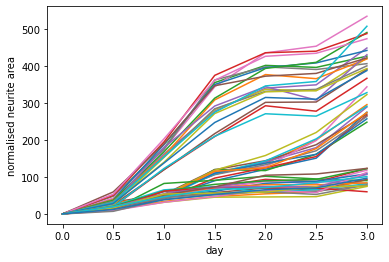

In [16]:
plt.figure()
df_plt = df.plot(legend=False)
df_plt.set_ylabel("normalised neurite area")

In [22]:
df.to_csv('pre-processed_norm_neurite_area_t.csv')